# Imports

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

pio.renderers.default = "png"
config = dict({'scrollZoom': True})

from joblib import dump

# Data Processing

In [2]:
data = pd.read_csv('D:/ML_Data/Daily Visitors/daily-website-visitors.csv')
data.rename(columns = {'Day.Of.Week':'Day of the Week'
                    ,'Page.Loads':'Total Visits'
                    ,'Unique.Visits':'Unique Visits'
                    ,'First.Time.Visits':'First Time Visits'
                    ,'Returning.Visits':'Returning Visits'}, inplace = True)
data = data.replace(',', '', regex=True)

data['Total Visits'] = data['Total Visits'].astype(int)
data['Unique Visits'] = data['Unique Visits'].astype(int)
data['First Time Visits'] = data['First Time Visits'].astype(int)
data['Returning Visits']=data['Returning Visits'].astype(int)

data

,Row,Day,Day of the Week,Date,Total Visits,Unique Visits,First Time Visits,Returning Visits
0,1,Sunday,1,9/14/2014,2146,1582,1430,152
1,2,Monday,2,9/15/2014,3621,2528,2297,231
2,3,Tuesday,3,9/16/2014,3698,2630,2352,278
3,4,Wednesday,4,9/17/2014,3667,2614,2327,287
4,5,Thursday,5,9/18/2014,3316,2366,2130,236
...,...,...,...,...,...,...,...,...
2162,2163,Saturday,7,8/15/2020,2221,1696,1373,323
2163,2164,Sunday,1,8/16/2020,2724,2037,1686,351
2164,2165,Monday,2,8/17/2020,3456,2638,2181,457
2165,2166,Tuesday,3,8/18/2020,3581,2683,2184,499


In [32]:
sums=data.groupby(['Day'])[['Total Visits', 'Unique Visits', 'First Time Visits' ,'Returning Visits']].mean().sort_values(
    by='Day',ascending=False)

In [33]:
sums

,Total Visits,Unique Visits,First Time Visits,Returning Visits
Day,,,,
Wednesday,4893.916129,3502.012903,2895.490323,606.522581
Tuesday,4955.335484,3539.293548,2928.232258,611.061290
Thursday,4651.355987,3327.553398,2747.317152,580.236246
Sunday,3246.980645,2341.270968,1949.025806,392.245161
Saturday,2501.025890,1786.747573,1477.181230,309.566343
Monday,4845.680645,3458.425806,2858.180645,600.245161
Friday,3719.860841,2646.770227,2164.417476,482.352751


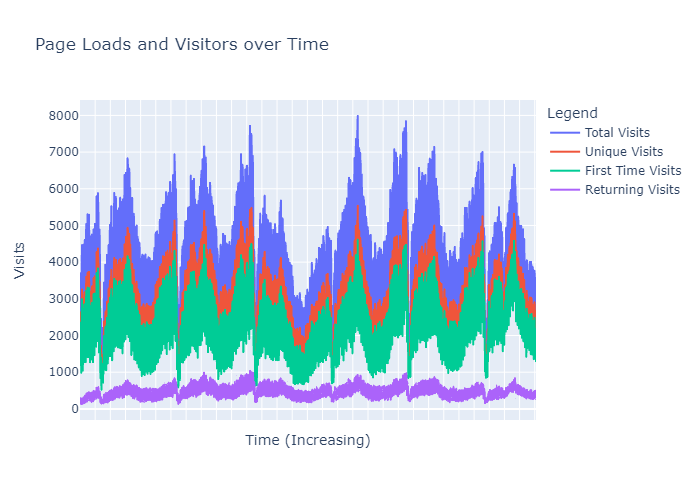

In [31]:
px.line(data,x='Date',y=['Total Visits' ,'Unique Visits' ,'First Time Visits' ,'Returning Visits'],
       labels={'value': 'Visits', 'variable': 'Legend', 'Date': 'Time (Increasing)'}, title='Page Loads and Visitors over Time').update_xaxes(showticklabels=False)

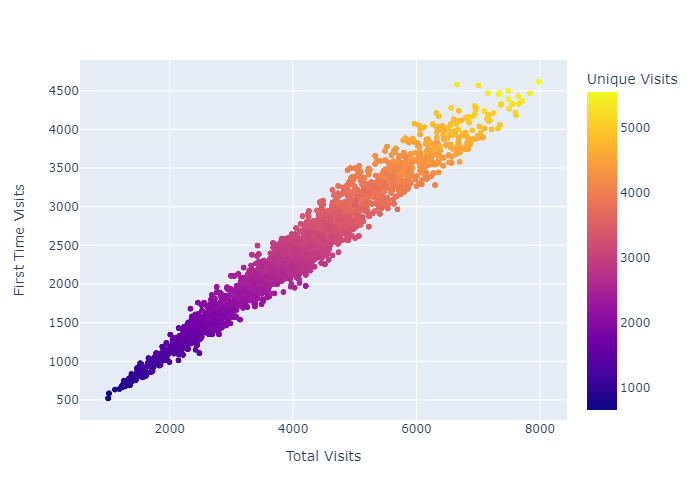

In [41]:
px.scatter(data,x='Total Visits', y='First Time Visits', color='Unique Visits')

In [24]:
data.to_csv('visitors.csv')
sums.to_csv('visitors_sum.csv')

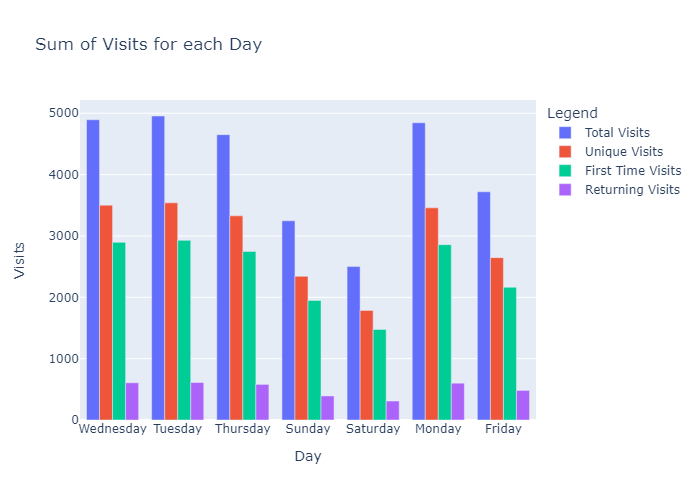

In [42]:
px.bar(sums, barmode='group', title='Sum of Visits for each Day', labels={'value': 'Visits', 'variable': 'Legend'})

# Model Set-Up and Training

In [43]:
X = data[['Total Visits', 'Unique Visits']]
y = data[['First Time Visits', 'Returning Visits']]

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [45]:
X_train.shape

(1733,)

In [46]:
y_train.shape

(1733,)

In [47]:
X_test.shape

(434,)

In [48]:
y_test.shape

(434,)

In [49]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[4905. 1960. 3537. ... 4390. 2686. 6060.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [19]:
print(f'Random Forest Regressor Accuracy: {int(rf.score(X_test, y_test)*100)}%')

Random Forest Regressor Accuracy: 86%


In [21]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [22]:
print(f'Multi Dimensional Linear Regression Accuracy: {int(lr.score(X_test, y_test)*100)}%')

Multi Dimensional Linear Regression Accuracy: 90%


# Saving Models

In [40]:
dump(lr, 'lr_visitors.joblib')
dump(lr, 'rf_visitors.joblib')

['rf_visitors.joblib']